## Testing the New Models

### Meyer Dataset

#### Reconstruction Property

Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Data

In [2]:
data=np.load('data/dataset_meyer/dataset_meyer_test_256_100.npz')
n=data['density']
f=data['F']
e=data['energy']
n_torch=torch.from_numpy(n)[-100:]
f_torch=torch.from_numpy(f)[-100:]
e_torch=torch.from_numpy(e)[-100:]
model=torch.load('model_dft_pytorch/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_16_l1_0.0_l2_0.001',map_location='cpu')
#model=torch.load('model_dft_pytorch/meyer_case/meyer_model_60_hc_13_ks_2_ps_[40, 40, 40, 40, 40]_hidden_neurons_16_ls_0.0_alpha_0.01_vb',map_location='cpu')
model.eval()
model=model.double()


Reconstruction Test

In [4]:
n_torch = n_torch.unsqueeze(1)
latent_mu, latent_logvar = model.Encoder(n_torch)
n_recon = model.Decoder(latent_mu)
dx=1/256
print(n_recon.shape)
dn=torch.sum(torch.abs(n_torch.squeeze(1)-n_recon.squeeze(1)),dim=-1)*dx
dn=dn.mean()
print(dn.item())

torch.Size([100, 1, 256])
0.0013234195449086067


Visualization

In [ ]:
n_recon_img=n_recon.squeeze(1).detach().cpu().numpy()
n_img=n_torch.squeeze(1).detach().cpu().numpy()

for i in range(3):
    plt.plot(n_recon_img[i])
    plt.plot(n_img[i])
    plt.show()

Prediction Test (MODEL B)

In [ ]:
print(n_torch.shape)
latent_mu, latent_logvar = model.Encoder(n_torch)
f_ml=model.DFTModel(latent_mu).view(-1)

df=torch.abs(f_torch-f_ml)

print(df.mean()*627,df.std()*627)


Prediction Test (MODEL A)

In [5]:

f_ml=model.DFTModel(n_torch).view(-1)

df=torch.abs(f_torch-f_ml)

print(df.mean()*627,df.std()*627)

tensor(0.7091, dtype=torch.float64) tensor(0.6309, dtype=torch.float64)


### Speckle Dataset

#### Reconstruction Property

Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Data

In [ ]:
data=np.load('data/final_dataset/data_test.npz')
n=data['density']
f=data['F']
e=data['energy']
n_torch=torch.from_numpy(n)[-100:]
f_torch=torch.from_numpy(f)[-100:]
e_torch=torch.from_numpy(e)[-100:]
model=torch.load('model_dft_pytorch/speckle_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_16_l1_0.0_l2_0.001',map_location='cpu')
#model=torch.load('model_dft_pytorch/meyer_case/meyer_model_60_hc_13_ks_2_ps_[40, 40, 40, 40, 40]_hidden_neurons_16_ls_0.0_alpha_0.01_vb',map_location='cpu')
model.eval()
model=model.double()


Reconstruction Test

In [4]:
n_torch = n_torch.unsqueeze(1)
latent_mu, latent_logvar = model.Encoder(n_torch)
n_recon = model.Decoder(latent_mu)
dx=1/256
print(n_recon.shape)
dn=torch.sum(torch.abs(n_torch.squeeze(1)-n_recon.squeeze(1)),dim=-1)*dx
dn=dn.mean()
print(dn.item())

torch.Size([100, 1, 256])
0.003185480527895136


Visualization

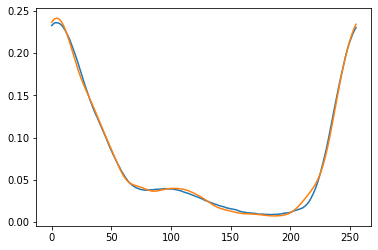

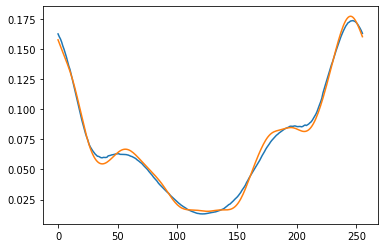

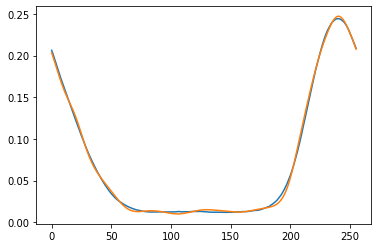

In [5]:
n_recon_img=n_recon.squeeze(1).detach().cpu().numpy()
n_img=n_torch.squeeze(1).detach().cpu().numpy()

for i in range(3):
    plt.plot(n_recon_img[i])
    plt.plot(n_img[i])
    plt.show()

Prediction Test (MODEL B)

In [ ]:
print(n_torch.shape)
latent_mu, latent_logvar = model.Encoder(n_torch)
f_ml=model.DFTModel(latent_mu).view(-1)

df=torch.abs(f_torch-f_ml)

print(df.mean()*627,df.std()*627)


Prediction Test (MODEL A)

In [7]:

f_ml=model.DFTModel(n_torch).view(-1)

df=torch.abs(f_torch-f_ml)

print(df.mean()*627,df.std()*627)

tensor(0.0575, dtype=torch.float64) tensor(0.0508, dtype=torch.float64)


### 3D Speckle Dataset

#### Reconstruction Property

Imports

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Data

In [11]:
data=np.load('data/dataset_speckle_3d/test.npz')
n=data['density']
f=data['F']
e=data['energy']
n_torch=torch.from_numpy(n)[-100:]
f_torch=torch.from_numpy(f)[-100:]
e_torch=torch.from_numpy(e)[-100:]
model=torch.load('model_dft_pytorch/3d_speckle/DFTVAEnorm3D_hidden_channels_vae_[60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60]_kernel_size_[3, 3, 3]_pooling_size_[2, 2, 2]_latent_dimension_16_l1_0.0_l2_1e-07_36k',map_location='cpu')
#model=torch.load('model_dft_pytorch/meyer_case/meyer_model_60_hc_13_ks_2_ps_[40, 40, 40, 40, 40]_hidden_neurons_16_ls_0.0_alpha_0.01_vb',map_location='cpu')
model.eval()
model=model.double()


Reconstruction Test

In [12]:
n_torch = n_torch.unsqueeze(1)
latent_mu, latent_logvar = model.Encoder(n_torch)
n_recon = model.Decoder(latent_mu)
dx=2/18
print(n_recon.shape)
dn=torch.sum(torch.abs(n_torch.squeeze(1)-n_recon.squeeze(1)),dim=(-1,-2,-3))*dx**3
dn=dn.mean()
print(dn.item())

torch.Size([100, 1, 18, 18, 18])
0.0252278494914735


Visualization

In [ ]:
n_recon_img=n_recon.squeeze(1).detach().cpu().numpy()
n_img=n_torch.squeeze(1).detach().cpu().numpy()

# for i in range(2):
#     plt.plot(n_recon_img[i,0,0,:])
#     plt.plot(n_img[i,0,0,:])
#     plt.show()
    
# for i in range(2):
#     plt.plot(n_recon_img[i,0,:,0])
#     plt.plot(n_img[i,0,:,0])
#     plt.show()


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np


# Make data.
x = np.linspace(0, 2, 18)
y = np.linspace(0, 2, 18)
x, y = np.meshgrid(x, y)

# Plot the surface.
for i in range(18):
    #fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    fig=plt.figure()
    # ax.plot_surface(x, y, n_recon_img[0,:,:,i], color='blue',alpha=0.5,
    #                    linewidth=0, antialiased=False)
    # ax.plot_surface(x, y, np.abs(n_img[0,:,:,i]-n_recon_img[0,:,:,i]),
    #                    linewidth=0, antialiased=False,alpha=0.2,color='red')
    
    plt.imshow(np.abs(n_img[0,:,:,i]-n_recon_img[0,:,:,i]))
    plt.colorbar()
    
    plt.show()

Prediction Test (MODEL B)

In [ ]:
print(n_torch.shape)
latent_mu, latent_logvar = model.Encoder(n_torch)
f_ml=model.DFTModel(latent_mu).view(-1)

df=torch.abs(f_torch-f_ml)

print(df.mean()*627,df.std()*627)


Prediction Test (MODEL A)

In [5]:

f_ml=model.DFTModel(n_torch).view(-1)

df=torch.abs(f_torch-f_ml)

print(df.mean()*627,df.std()*627)

tensor(0.5612, dtype=torch.float64, grad_fn=<MulBackward0>) tensor(0.4290, dtype=torch.float64, grad_fn=<MulBackward0>)


## Test the Gradient Descent

### Meyer Dataset

Show data

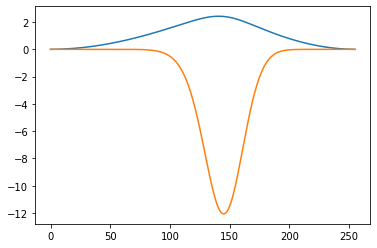

In [20]:
data=np.load('data/dataset_meyer/dataset_meyer_test_256_100.npz')

n=data['density']
v=data['potential']

plt.plot(n[0])
plt.plot(v[0])
plt.show()


#### Different $\beta=0.1,0.001,10^{-5}$ 

Imports

In [21]:
import numpy as np
import matplotlib.pyplot as plt 


Load Data

In [42]:
vbs=['0.1','0.001','1e-05']
min_energy={}
gs_energy={}
min_density={}
gs_density={}

for vb in vbs:
    data_density=np.load(f'data/gradient_descent/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_8_l1_0.0_l2_{vb}_number_istances_100_n_ensamble_1_different_initial_epochs_14999_lr_1_density.npz')
    data_energy=np.load(f'data/gradient_descent/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_8_l1_0.0_l2_{vb}_number_istances_100_n_ensamble_1_different_initial_epochs_14999_lr_1_energy.npz')
    
    min_energy[vb]=data_energy['min_energy']
    gs_energy[vb]=data_energy['gs_energy']
    
    gs_density[vb]=data_density['gs_density']
    min_density[vb]=data_density['min_density']
    

Visualization

vb=0.1, de=-1.55461256452083 

vb=0.1 max de =3.2915938478073965 

vb=0.001, de=0.2755169394474033 

vb=0.001 max de =8.044668076216928 

vb=1e-05, de=12.985530006689267 

vb=1e-05 max de =83.51654948028929 



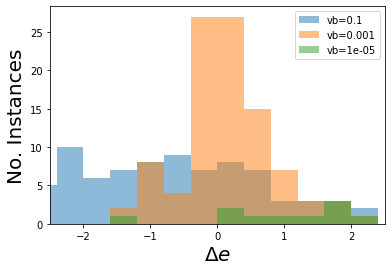

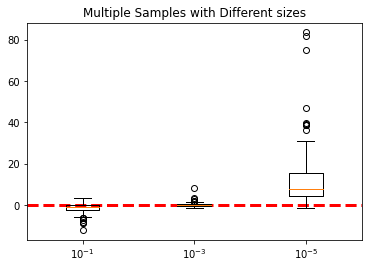

In [49]:
de={}
xmax=2.5
xmin=-2.5

for vb in vbs:
    de[vb]=(gs_energy[vb]-min_energy[vb])
    print(f'vb={vb}, de={np.average(de[vb])*627} \n')
    print(f'vb={vb} max de ={np.max(de[vb])*627} \n')
    plt.hist(de[vb]*627,bins=500,label=f'vb={vb}',range=(-100,100),alpha=0.5)
plt.xlabel(r'$\Delta e$',fontsize=20)
plt.ylabel(r'No. Instances',fontsize=20)
plt.xlim((xmin,xmax))
plt.legend()
plt.show()

data = [de['0.1']*627,de['0.001']*627,de['1e-05']*627]
fig, ax = plt.subplots()
ax.axhline(y=0.,color='red',linewidth=3,linestyle='--')
ax.set_title('Multiple Samples with Different sizes')
ax.boxplot(data)
ax.set_xticks([1,2,3],[r'$10^{-1}$',r'$10^{-3}$',r'$10^{-5}$'])
plt.show()
    

In [41]:
dn={}

for vb in vbs:
    dn[vb]=np.sum(np.abs(gs_density[vb]-min_density[vb]),axis=-1)*(1/256)
    print(f'vb={vb}, dn={np.average(dn[vb])} \n')
    print(f'vb={vb} max dn ={np.max(dn[vb])} \n')
    plt.hist(dn[vb],bins=50,label=f'vb={vb}',range=(0,0.09),alpha=0.5)
plt.xlabel(r'$\Delta n$',fontsize=20)
plt.ylabel(r'No. Instances',fontsize=20)
plt.legend()
plt.show()




KeyError: '0.1'

#### Different Latent Dimension $l_d=4,8,16$

Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt 

Load Data

In [36]:
lds=[4,8,16]
min_energy={}
gs_energy={}
min_density={}
gs_density={}

for ld in lds:
    data_density=np.load(f'data/gradient_descent/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_{ld}_l1_0.0_l2_0.001_number_istances_100_n_ensamble_1_different_initial_epochs_14999_lr_1_density.npz')
    data_energy=np.load(f'data/gradient_descent/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_{ld}_l1_0.0_l2_0.001_number_istances_100_n_ensamble_1_different_initial_epochs_14999_lr_1_energy.npz')
    
    min_energy[ld]=data_energy['min_energy']
    gs_energy[ld]=data_energy['gs_energy']
    
    gs_density[ld]=data_density['gs_density']
    min_density[ld]=data_density['min_density']
    

Visualization

ld=4, de=0.6322110702599638 

ld=4 max de =10.039360637350615 

ld=8, de=0.6474458333887709 

ld=8 max de =8.044668076216928 

ld=16, de=0.6730503207514894 

ld=16 max de =10.476058074478066 



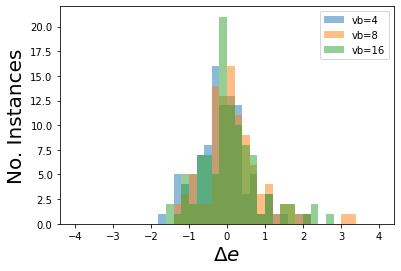

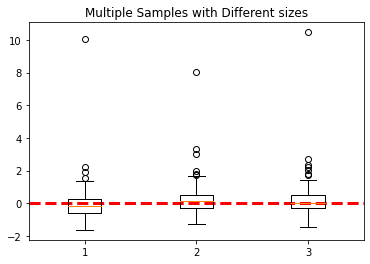

In [40]:
de={}
de_abs={}
for ld in lds:
    de_abs[ld]=np.abs(gs_energy[ld]-min_energy[ld])
    de[ld]=(gs_energy[ld]-min_energy[ld])
    print(f'ld={ld}, de={np.average(de_abs[ld])*627} \n')
    print(f'ld={ld} max de ={np.max(de_abs[ld])*627} \n')
    plt.hist(de[ld]*627,bins=40,label=f'vb={ld}',range=(-4,4),alpha=0.5)
plt.xlabel(r'$\Delta e$',fontsize=20)
plt.ylabel(r'No. Instances',fontsize=20)
plt.legend()
plt.show()



data = [de[4]*627,de[8]*627,de[16]*627]
fig, ax = plt.subplots()
ax.axhline(y=0.,color='red',linewidth=3,linestyle='--')
ax.set_title('Multiple Samples with Different sizes')
ax.boxplot(data)

plt.show()

### Speckle Dataset

#### Different $\beta=10^{-3},10^{-5},10^{-7}$ 

Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 


Load Data

In [50]:
vbs=['0.001','1e-05','1e-07']
min_energy={}
gs_energy={}
min_density={}
gs_density={}

for vb in vbs:
    data_density=np.load(f'data/gradient_descent/speckle_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_16_l1_0.0_l2_{vb}_number_istances_100_n_ensamble_1_different_initial_epochs_49999_lr_1_density.npz')
    data_energy=np.load(f'data/gradient_descent/speckle_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_16_l1_0.0_l2_{vb}_number_istances_100_n_ensamble_1_different_initial_epochs_49999_lr_1_energy.npz')
    
    min_energy[vb]=data_energy['min_energy']
    gs_energy[vb]=data_energy['gs_energy']
    
    gs_density[vb]=data_density['gs_density']
    min_density[vb]=data_density['min_density']
    

Visualization

vb=0.001, de=2.393467322115981 

vb=0.001 max de =7.159300086097441 

vb=1e-05, de=0.9992329214893126 

vb=1e-05 max de =2.8709273767103745 

vb=1e-07, de=0.5909198760607741 

vb=1e-07 max de =2.122321910541111 



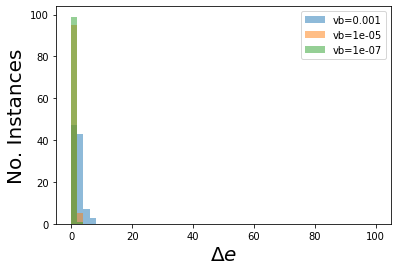

In [51]:
de={}

for vb in vbs:
    de[vb]=np.abs(gs_energy[vb]-min_energy[vb])
    print(f'vb={vb}, de={np.average(de[vb])*627*0.5} \n')
    print(f'vb={vb} max de ={np.max(de[vb])*627*0.5} \n')
    plt.hist(de[vb]*627*0.5,bins=50,label=f'vb={vb}',range=(0,100),alpha=0.5)
plt.xlabel(r'$\Delta e$',fontsize=20)
plt.ylabel(r'No. Instances',fontsize=20)
plt.legend()
plt.show()
    

vb=0.001, dn=0.006513995046958166 

vb=0.001 max dn =0.03344963399995794 

vb=1e-05, dn=0.0027029112018050394 

vb=1e-05 max dn =0.009560532909839312 

vb=1e-07, dn=0.0015873363347214 

vb=1e-07 max dn =0.006184702691047614 



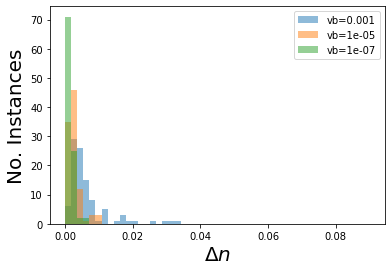

In [52]:
dn={}

for vb in vbs:
    dn[vb]=np.sum(np.abs(gs_density[vb]-min_density[vb]),axis=-1)*(1/256)
    print(f'vb={vb}, dn={np.average(dn[vb])} \n')
    print(f'vb={vb} max dn ={np.max(dn[vb])} \n')
    plt.hist(dn[vb],bins=50,label=f'vb={vb}',range=(0,0.09),alpha=0.5)
plt.xlabel(r'$\Delta n$',fontsize=20)
plt.ylabel(r'No. Instances',fontsize=20)
plt.legend()
plt.show()

## Operation with Datasets 

Imports

In [2]:
import numpy as np


Data

In [4]:
data=np.load('data/dataset_speckle_3d/Speckle3rdbatch.npz')
data_2=np.load('data/dataset_speckle_3d/Speckle2ndbatch.npz')


density=data['dens']
density_2=data_2['dens']

potential=data['speckle']
potential_2=data_2['speckle']

energy=data['ene']
energy_2=data_2['ene']

e_ext=np.sum(potential*density,axis=(-1,-2,-3))*(2/18)**3
e_ext_2=np.sum(potential_2*density_2,axis=(-1,-2,-3))*(2/18)**3


density=np.append(density,density_2,axis=0)
potential=np.append(potential,potential_2,axis=0)
e_ext=np.append(e_ext,e_ext_2,axis=0)
energy=np.append(energy,energy_2,axis=0)

print(energy.shape)



(72000,)


In [6]:
data=np.load('data/dataset_speckle_3d/Gaussian1stbatch.npz')



density=data['dens']


potential=data['speckle']

energy=data['ene']

e_ext=np.sum(potential*density,axis=(-1,-2,-3))*(2/18)**3



print(energy.shape)

(36000,)


In [5]:
f=energy-e_ext

data=np.savez('data/dataset_gaussian_3d/train',F=f,energy=energy,density=density,potential=potential)

## Analysis of the Dataset

#### 3D Speckle

Imports

In [53]:
import numpy as np
import matplotlib.pyplot as plt

Data

In [54]:
data=np.load('data/dataset_speckle_3d/test.npz')

density=data['density']
f=data['F']
energy=data['energy']
potential=data['potential']

Visualization

Histogram of the energy values

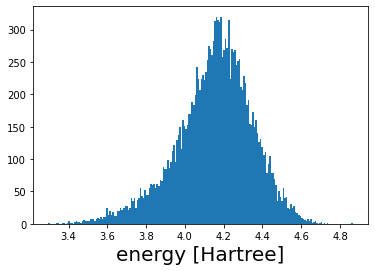

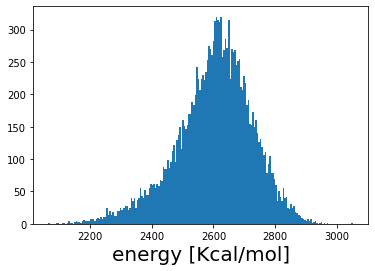

In [55]:
plt.hist(energy,bins=200,)
plt.xlabel('energy [Hartree]',fontsize=20)
plt.show()

plt.hist(energy*627,bins=200,)
plt.xlabel('energy [Kcal/mol]',fontsize=20)
plt.show()

Histogram of the universal term

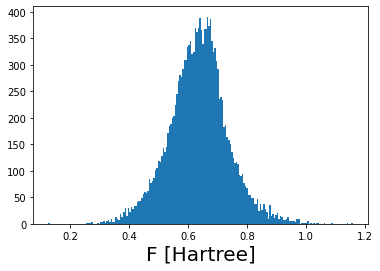

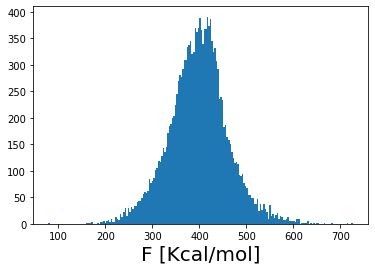

In [13]:
plt.hist(f,bins=200,)
plt.xlabel('F [Hartree]',fontsize=20)
plt.show()

plt.hist(f*627,bins=200,)
plt.xlabel('F [Kcal/mol]',fontsize=20)
plt.show()

Profiles